## 앙상블 기법

###  앙상블 개요

#### 앙상블 학습을 통한 분류
- 여러개의 분류기를 생성하고 그 예측을 결합하여 정확한 최종 예측을 기대하는 기법

#### 앙상블 학습의 목표
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측 값을 얻는 것
- 현재 정형데이터를 대상으로 하는 분류기에서는 앙상블 기법이 뛰어난 성과를 보여주고 있음

#### voting
- 전체 데이터셋을 여러 알고리즘 기법으로 돌려 다수결의 원칙으로 결정

#### bagging
- bagging의 경우 데이터를 중복을 허용해서 샘플링하고 그 각각의 데이터에 같은 알고리즘을 적용해서 결과를 투표로 결정함
- 각각의 분류기에 데이터를 각각 샘플링해서 추출하는 방식을 부트스트래핑(bootstrapping) 분할 방식이라고 함

#### 최종 결정에서 하드보팅
- 다수결의 원칙과 비슷함

#### 최종 결정에서 소프트보팅
- 확률의 평균값을 취하여 라벨의 확률이 더 높은 값을 채택, 동률이면 다수결을 따라감

#### 랜덤포레스트 Random Forest
- 같은 알고리즘으로 구현하는 배깅(Bagging)의 대표적인 방법
- 앙상블 방법 중에서 비교적 속도가 빠르며 다양한 영역에서 높은 성능을 보여주고 있음
    - 부트스트래핑은 여러 개의 작은 데이터 셋을 중첨을 허용해서 만드는 것
- 랜덤포레스트는 결정 나무를 기본으로 함
    - 부트스트래핑으로 샘플링된 데이터마다 결정나무가 예측한 결과를 소프트보팅으로 최종 예측 결론을 얻음

---

### HAR데이터 (Human Activity Recognition
- IMU 센서를 활용해서 사람의 행동을 인식하는 실험
- 폰에 있는 가속도/자이로 센서 사용
    - 자이로 센서는 회전하는 각 속도를 측정
    - 가속도 성분을 측정

#### 데이터 소개

![har](../data/har.png)

#### 데이터의 특성
- 가속도계로부터의 3축 가속도 (총 가속도) 및 추정 된 신체 가속도
- 자이로 스코프의 3축 가속도
- 시간 및 주파수 영역 변수가 포함된 561 기능 벡터
- 활동 라벨
- 실험을 수행한 대상의 식별자

#### 데이터의 클래스
- Walking Upstairs
- Standing 
- Walking Downstairs
- Sitting
- Laying
- Walking

#### 시간영역의 데이터를 직접 사용하는 것은 어렵다
- 시간영역 데이터를 머신러닝에 적용하기 위해 여러 통계적 데이터로 변환함
- 시간 영역의 평균, 분산, 피크, 중간값, 주파수 영역의 평균, 분산 등으로 변환한 수치를 가지고 있음
- 특징추출 (Feature extracting)

#### 데이터 읽기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
feature_name_df = pd.read_csv(url, sep='\s+', header=None, 
                             names=['columns_index', 'column_name'])
feature_name_df.head()

,columns_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


- 특성 이름만 불러왔다.

In [3]:
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   columns_index  561 non-null    int64 
 1   column_name    561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [4]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

#### 일단 X 데이터만

In [5]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


- 대용량의 데이터이다

In [8]:
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


#### y데이터 읽어오기

In [9]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [11]:
y_train

,action
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [12]:
# 각 액션별 데이터의 수
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

- 1. Walking
- 2. Walking Upstairs
- 3. Walking Downstairs
- 4. Sitting
- 5. Standing
- 6. Laying

### 의사결정나무 적용

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

#### max_depth를 다양하게 하기 위해 GridSearchCV 이용

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, 
                       scoring='accuracy',
                       cv=5, 
                       return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [15]:
grid_cv.best_score_

0.8543335321892183

In [16]:
grid_cv.best_params_

{'max_depth': 8}

#### max_depth별로 표로 성능을 정리

In [17]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [18]:
cv_results_df= cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]
cv_results_df

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


- train과 test의 score차이가 있음. 과적합일까?

In [19]:
max_depth = [6, 8, 10, 12, 16, 20, 24]
    
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(X_train, y_train)
    
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    print('Max_Depth: ', depth, ', Accuracy: ', accuracy)

Max_Depth:  6 , Accuracy:  0.8554462164913471
Max_Depth:  8 , Accuracy:  0.8734306073973532
Max_Depth:  10 , Accuracy:  0.8615541228367831
Max_Depth:  12 , Accuracy:  0.8595181540549711
Max_Depth:  16 , Accuracy:  0.8669833729216152
Max_Depth:  20 , Accuracy:  0.8652867322701052
Max_Depth:  24 , Accuracy:  0.8652867322701052


- train, test 셋 모두 max_depth가 8일 때 성능이 좋다

#### 베스트 모델 결과

In [20]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

### 랜덤포레스트 적용

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [6, 8, 10],
    'n_estimators': [50, 100, 200], # Tree 50그루, 100그루, 200그루
    'min_samples_leaf': [8, 12], # leaf의 들어오는 최소의 데이터 개수
    'min_samples_split': [8, 12] # 분할기준에서 최소한으로 남는 데이터   
}

In [22]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1) # n_jobs는 cpu코어 사용개수
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

#### 결과 정리

In [23]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [24]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


- 성능이 좋다

#### best 모델

In [25]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [26]:
grid_cv.best_score_

0.9151251360174102

- validaition set score이다

#### test 데이터에 적용

In [27]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

C:\Users\seonwook\AppData\Local\Temp/ipykernel_222252/846639337.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [29]:
pred = rf_clf_best.predict(X_test)
accuracy_score(y_test, pred)

0.9205972175093315

- test데이터에 의한 score이다
- decision tree에 비해서 성능이 엄청 좋다

#### 중요 특성 확인

In [32]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
best_cols

tBodyAcc-mean()-X                       0.000096
tBodyAcc-mean()-Y                       0.000217
tBodyAcc-mean()-Z                       0.000058
tBodyAcc-std()-X                        0.007843
tBodyAcc-std()-Y                        0.000252
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000203
angle(tBodyGyroJerkMean,gravityMean)    0.000270
angle(X,gravityMean)                    0.034638
angle(Y,gravityMean)                    0.026553
angle(Z,gravityMean)                    0.012837
Length: 561, dtype: float64

In [33]:
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

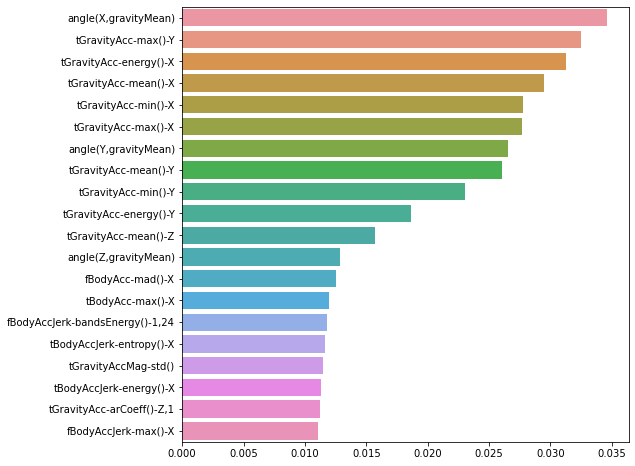

In [34]:
# 주요 특성 시각화
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

#### 20개 특성만 가지고 다시 성능 확인

In [35]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

In [36]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249

- 561개의 특성보다 20개의 특성만 보면 연산속도가 정말 빠르다
- 비록 acc가 떨어지더라도